In [1]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [2]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

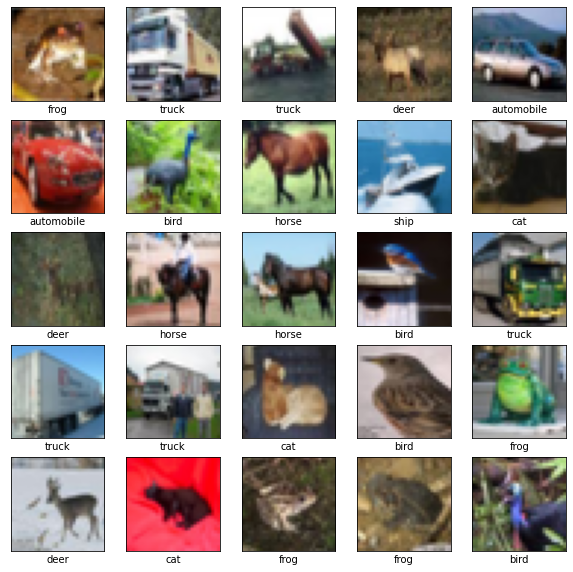

In [3]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

In [4]:
# Creating CNN layers

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
Total params: 56,320
Trainable params: 56,320
Non-trainable params: 0
_________________________________________________________________


In [6]:
# Fully Connected models

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                6

In [8]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=20, 
                    validation_data=(test_images, test_labels))

Epoch 1/20
1563/1563 [==============================] - 22s 14ms/step - loss: 1.5150 - accuracy: 0.4466 - val_loss: 1.2408 - val_accuracy: 0.5572
Epoch 2/20
1563/1563 [==============================] - 22s 14ms/step - loss: 1.1348 - accuracy: 0.5989 - val_loss: 1.0678 - val_accuracy: 0.6262
Epoch 3/20
1563/1563 [==============================] - 22s 14ms/step - loss: 0.9823 - accuracy: 0.6547 - val_loss: 1.0052 - val_accuracy: 0.6509
Epoch 4/20
1563/1563 [==============================] - 22s 14ms/step - loss: 0.8796 - accuracy: 0.6932 - val_loss: 0.8772 - val_accuracy: 0.6956
Epoch 5/20
1563/1563 [==============================] - 22s 14ms/step - loss: 0.8068 - accuracy: 0.7187 - val_loss: 0.9040 - val_accuracy: 0.6857
Epoch 6/20
1563/1563 [==============================] - 23s 14ms/step - loss: 0.7457 - accuracy: 0.7400 - val_loss: 0.8523 - val_accuracy: 0.7080
Epoch 7/20
1563/1563 [==============================] - 22s 14ms/step - loss: 0.6941 - accuracy: 0.7572 - val_loss: 0.8430 -

313/313 - 1s - loss: 1.2193 - accuracy: 0.7044


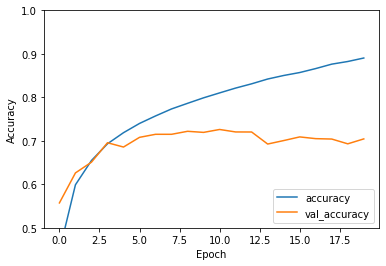

In [9]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

In [10]:
print(test_acc)

0.7044000029563904


In [11]:
import numpy as np

The test data is run on some images. The image and expected / actual labl is shown below each image


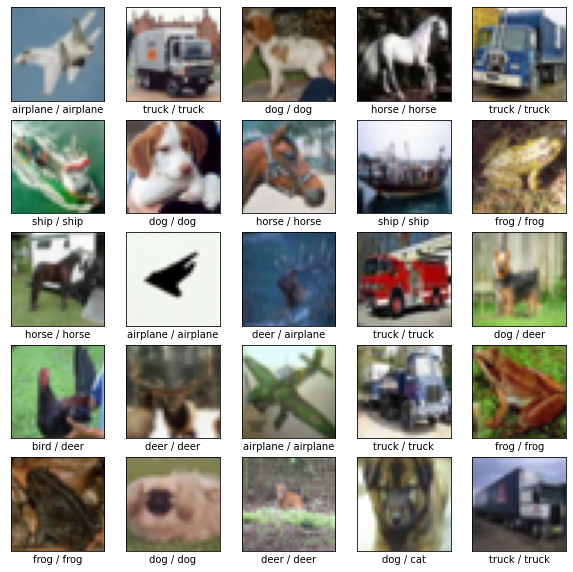

In [12]:
plt.figure(figsize=(10,10))
print("The test data is run on some images. The image and expected / actual labl is shown below each image")
for i in range(25):
    base=10
    image_index= base + i
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    output=model.predict(test_images[image_index:image_index+1])
    plt.imshow(test_images[image_index], cmap=plt.cm.binary)
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[test_labels[image_index][0]]+" / "+class_names[np.argmax(output)])
plt.show()

In [14]:
# Save the model to external file for future use

model.save('my_model')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: my_model/assets


In [16]:
from tensorflow import keras

# It can be used to reconstruct the model identically.
reconstructed_model = keras.models.load_model("my_model")

Expected =  cat
Actual= cat


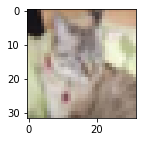

In [17]:
# Using reconstructed model to classify images
# Testing the model

image_index=8
output=reconstructed_model.predict(test_images[image_index:image_index+1])
plt.figure(figsize=(2,2))
plt.imshow(test_images[image_index])
print("Expected = ",class_names[test_labels[image_index][0]])
print("Actual=",class_names[np.argmax(output)])